# Customer Behavior Prediction Using Machine Learning Models

### Ridho Fachrezi Cholistyo / JCDSOL-02

## Business Problem Understanding

**Context**
Perusahaan saat ini menghadapi tantangan berupa penurunan loyalitas pelanggan, yang tercermin dari tingkat churn atau berhentinya pelanggan menggunakan layanan secara signifikan. Kondisi ini tidak hanya berpotensi menurunkan pendapatan, tetapi juga meningkatkan biaya akuisisi pelanggan baru dan mengganggu stabilitas pertumbuhan bisnis secara keseluruhan.

**Problem Statement**
Masalah ini menjadi perhatian utama bagi tim manajemen, pemasaran, dan customer retention. Mereka memerlukan solusi prediktif yang mampu mengidentifikasi pelanggan yang berpotensi churn sejak dini. Dengan informasi ini, intervensi strategis dapat dilakukan lebih cepat dan tepat sasaran untuk mencegah kehilangan pelanggan.

**Project Goals**
Proyek ini bertujuan untuk membangun model prediksi churn pelanggan yang andal, guna membantu perusahaan memahami pola dan faktor-faktor utama yang memengaruhi keputusan pelanggan untuk berhenti menggunakan layanan. Dengan memanfaatkan model ini, perusahaan dapat:

- Mengidentifikasi pelanggan berisiko tinggi secara lebih dini,

- Menyusun strategi retensi yang lebih efisien dan terarah,

- Mengoptimalkan proses pengambilan keputusan bisnis berbasis data, dan

- Meningkatkan loyalitas pelanggan serta efisiensi operasional secara keseluruhan.

## Data Understanding

Dataset terdiri dari 3941 data" pelanggan dengan variabel terkait perilaku pelanggan seperti Tenure, DaySinceLastOrder, CashbackAmount, SatisfactionScore, NumberOfDeviceRegistered, WarehouseToHome, serta atribut demografis seperti MaritalStatus dan PreferedOrderCat.

Target dari model ini adalah kolom Churn, yaitu :

1 = Pelanggan churn

0 = Pelanggan tidak churn

| Variabel                      | Deskripsi                          |
| -------------------------- | ---------------------------------- |
| Tenure                   | Lama menjadi pelanggan             |
| WarehouseToHome         | Jarak gudang ke rumah (dalam km)   |
| NumberOfDeviceRegistered | Jumlah perangkat yang terdaftar    |
| PreferedOrderCat         | Kategori pesanan favorit           |
| SatisfactionScore        | Skor kepuasan (1–5)                |
|MaritalStatus            | Status pernikahan                  |
| NumberOfAddress          | Jumlah alamat yang terdaftar       |
| Complain               | Apakah pernah komplain (0/1)       |
| DaySinceLastOrder       | Hari sejak pemesanan terakhir      |
| CashbackAmount          | Jumlah cashback yang diterima      |
| Churn                    | Target: 0 = tidak churn, 1 = churn |

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [41]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


## EDA

**Notes**       
Exploratory Data Analysis (EDA) adalah proses awal dalam analisis data yang bertujuan untuk memahami struktur, karakteristik, dan pola dari dataset sebelum melakukan pemodelan atau pengambilan keputusan.


### Data Overview

In [42]:
df.shape[0]

3941

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [44]:
df_revised = df

Membuat Var baru agar df lamanya tetap ada apabila terjadi error


### Checking Missing Value

In [45]:
print(df.isnull().sum())

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64


Ternyata setelah di cek masih ada data null atau kosong di data ini yang dimana totalnya adalah **576**
- Tenure : **194**
- WarehouseToHome : **169**
- DaySinceLastOrder : **213**

Dengan Missing Value yang terbilang sangat kecil, yaitu
| Kolom             | Missing | Persentase (%) |
| ----------------- | ------- | -------------- |
| Tenure            | 194     | \~4.92%        |
| WarehouseToHome   | 169     | \~4.29%        |
| DaySinceLastOrder | 213     | \~5.41%        |

saya akan menggunakan metode sederhana yaitu antara **mean, median, dan modus.**

### Checking Outliers

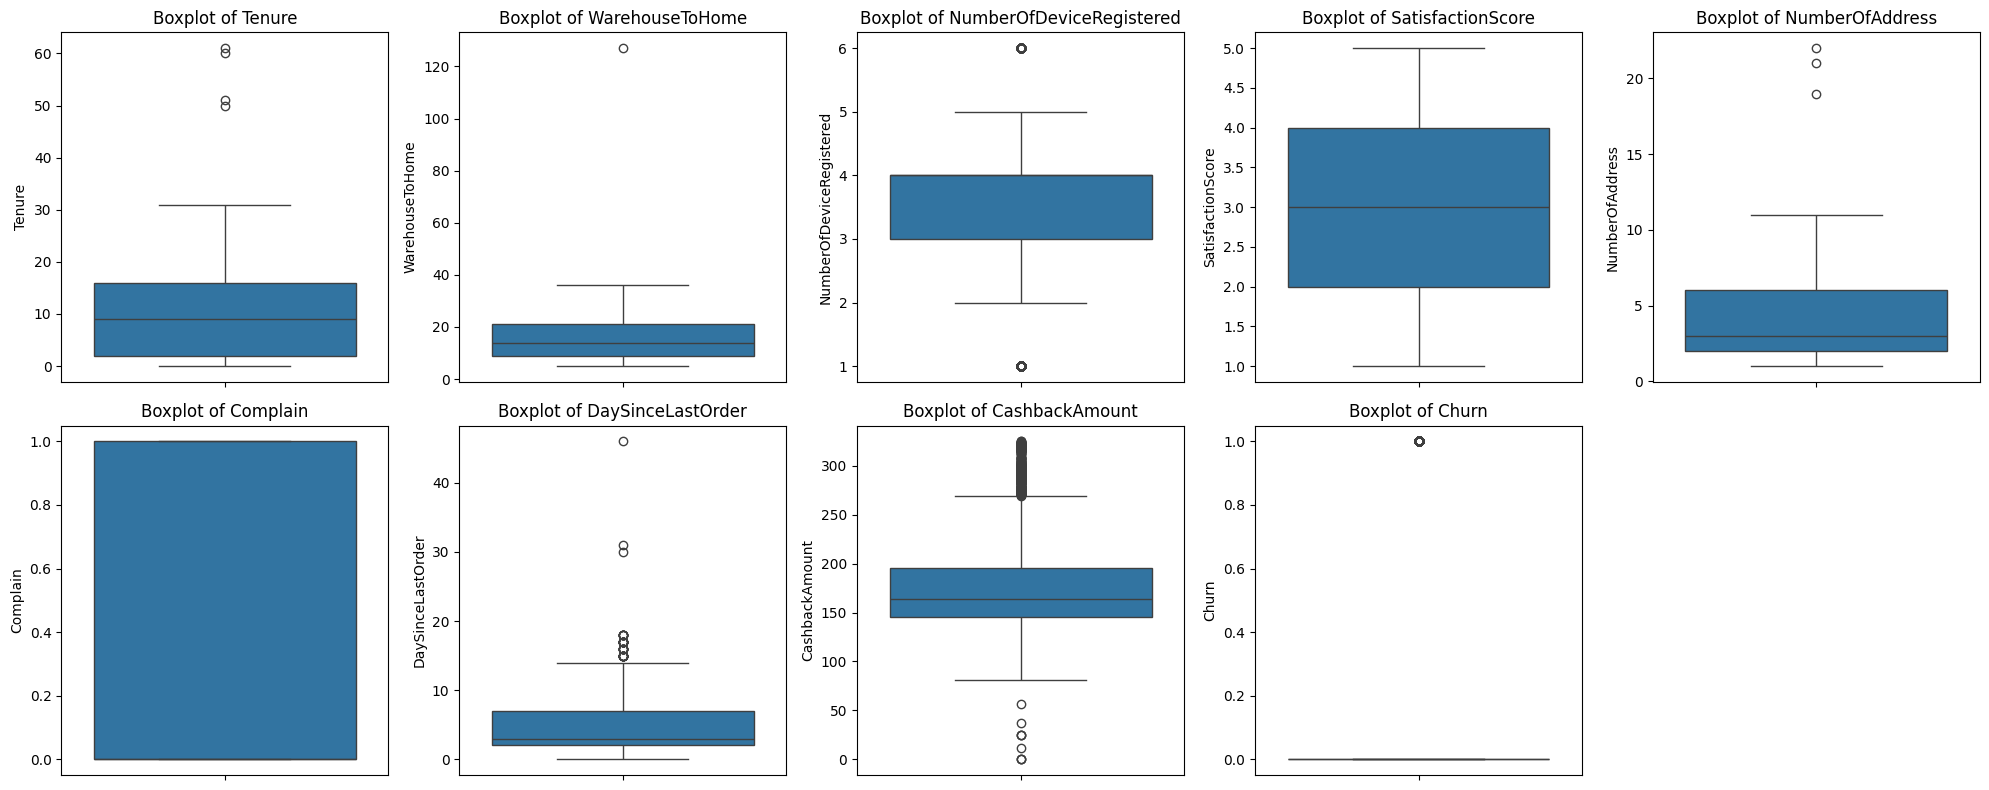

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(20, 8))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(2, 5, i+1)  
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


In [47]:
column = 'CashbackAmount'

Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
print(f"Jumlah outlier untuk kolom {column}: {outliers.shape[0]}")

Jumlah outlier untuk kolom CashbackAmount: 316


Terdapat 316 outlier dari total 3941 data. Outlier ini merujuk pada nilai-nilai cashback yang terletak jauh di luar rentang nilai umum yang diterima oleh mayoritas data.

Biasanya, outlier terjadi pada nilai yang sangat tinggi atau sangat rendah jika dibandingkan dengan nilai lainnya. Dalam konteks CashbackAmount, outlier ini bisa saja terjadi karena beberapa pelanggan mendapatkan cashback yang sangat besar atau sangat kecil dibandingkan dengan kebanyakan pelanggan lainnya. Hal ini bisa terjadi karena kebijakan promosi khusus, kesalahan input data, atau kejadian-kejadian tertentu yang tidak mencerminkan pola transaksi yang umum.

Dalam analisis ini, saya memutuskan untuk tidak menghilangkan outlier pada variabel CashbackAmount karena outlier tersebut dapat mewakili pola konsumsi atau perilaku pelanggan yang spesial dan berbeda. Misalnya, pelanggan yang menerima cashback besar mungkin merupakan pelanggan loyal atau premium yang melakukan pembelian dalam jumlah besar. Mereka ini kemungkinan adalah pelanggan yang sangat berharga bagi bisnis, sehingga sangat penting bagi model untuk dapat mengenali mereka dengan baik.

Selain itu, dalam konteks churn, pelanggan yang mendapatkan cashback besar cenderung lebih kurang berisiko untuk churn, karena mereka merasa mendapatkan keuntungan lebih dari transaksi mereka. Dengan mempertahankan outlier ini, model saya dapat lebih akurat dalam mengidentifikasi pelanggan yang memiliki potensi untuk tetap loyal dan meminimalkan risiko kehilangan pelanggan.

### Checking Target Variable

In [48]:
df['Churn'].value_counts()

Churn
0    3267
1     674
Name: count, dtype: int64

Bisa dilihat bahwa jumlah pelanggan yang tidak churn (0) jauh lebih banyak dibandingkan dengan pelanggan yang churn (1). Secara spesifik, dari total 3941 data, ada 3267 pelanggan tidak churn dan hanya 674 pelanggan churn. Ini artinya, ada ketidakseimbangan yang signifikan antara kedua kelas tersebut.

Ketidakseimbangan kelas ini dapat menjadi masalah dalam pengembangan model prediksi, karena model cenderung lebih mempelajari pola pada kelas mayoritas (dalam hal ini pelanggan yang tidak churn), sementara pola pada kelas minoritas (pelanggan churn) bisa terabaikan. Akibatnya, model bisa saja memprediksi bahwa semua pelanggan tidak churn, karena itu adalah prediksi yang paling sering muncul, yang tentunya tidak memberikan nilai tambah bagi pengambilan keputusan, terutama dalam hal mencegah churn.

## Data Preprocessing

### Handling Missing Value

In [49]:
df['Tenure'].describe()

count    3747.000000
mean       10.081398
std         8.498864
min         0.000000
25%         2.000000
50%         9.000000
75%        16.000000
max        61.000000
Name: Tenure, dtype: float64

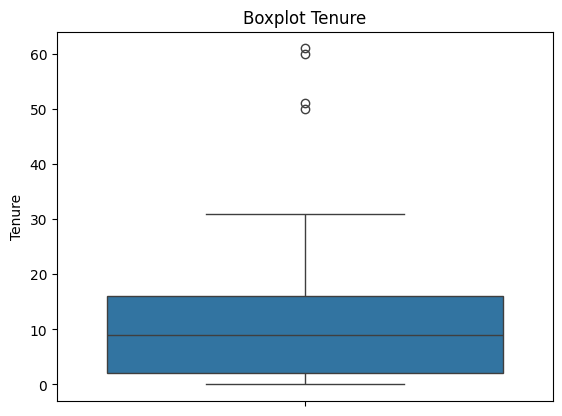

In [50]:
sns.boxplot(y=df['Tenure'])
plt.title('Boxplot Tenure')
plt.show()

Mengingat jumlah outlier pada kolom Tenure sangat sedikit dan tidak memberikan pengaruh signifikan terhadap distribusi data, saya memutuskan untuk menggunakan nilai median sebagai metode imputasi. Median dipilih karena lebih tahan terhadap outlier dibandingkan mean, sehingga mampu menjaga konsistensi data saat mengisi nilai yang hilang.

In [51]:
df_revised['Tenure'].fillna(df_revised['Tenure'].median(), inplace=True)
df_revised['Tenure'].isnull().sum()

C:\Users\Ridho\AppData\Local\Temp\ipykernel_22296\2561048308.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_revised['Tenure'].fillna(df_revised['Tenure'].median(), inplace=True)


np.int64(0)

In [52]:
df['WarehouseToHome'].describe()

count    3772.000000
mean       15.650583
std         8.452301
min         5.000000
25%         9.000000
50%        14.000000
75%        21.000000
max       127.000000
Name: WarehouseToHome, dtype: float64

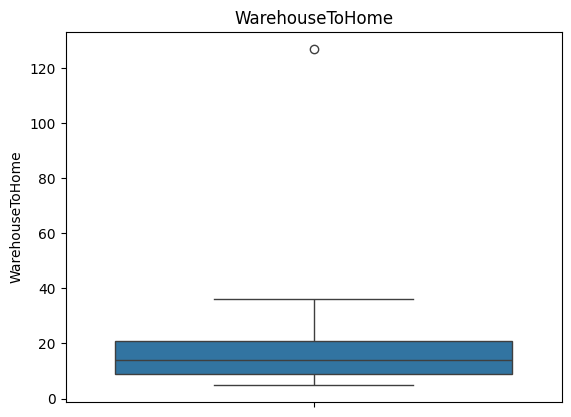

In [53]:
sns.boxplot(y=df['WarehouseToHome'])
plt.title('WarehouseToHome')
plt.show()

Sama seperti feature sebelumnya, jumlah outlier sangat sedikit dan tidak memberikan pengaruh signifikan terhadap distribusi data. Oleh karena itu, saya memilih untuk mengisi nilai-nilai yang hilang dengan **median**. Dengan metode median, akan mendapat nilai yang lebih stabil dan tidak terpengaruh oleh outlier. Sehingga akan memberikan hasil yang lebih representatif bagi data yang hilang tanpa mengganggu distribusi data yang ada.

In [54]:
df_revised['WarehouseToHome'].fillna(df_revised['WarehouseToHome'].median(), inplace=True)
df_revised['WarehouseToHome'].isnull().sum()

C:\Users\Ridho\AppData\Local\Temp\ipykernel_22296\3506373531.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_revised['WarehouseToHome'].fillna(df_revised['WarehouseToHome'].median(), inplace=True)


np.int64(0)

In [55]:
df['DaySinceLastOrder'].describe()

count    3728.000000
mean        4.531652
std         3.667648
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        46.000000
Name: DaySinceLastOrder, dtype: float64

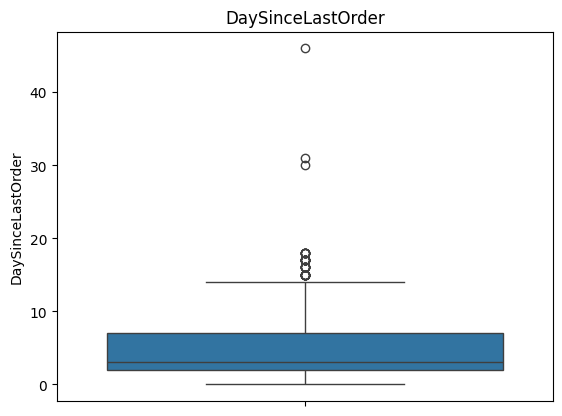

In [56]:
sns.boxplot(y=df['DaySinceLastOrder'])
plt.title('DaySinceLastOrder')
plt.show()

Sama seperti feature sebelumnya, walaupun jumlah outliernya lebih banyak dari sebelumnya, dampaknya tidak memberikan pengaruh signifikan terhadap distribusi data. Oleh karena itu, saya memilih untuk mengisi nilai-nilai yang hilang dengan **median**. Dengan metode median, akan mendapat nilai yang lebih stabil dan tidak terpengaruh oleh outlier. Sehingga akan memberikan hasil yang lebih representatif bagi data yang hilang tanpa mengganggu distribusi data yang ada.

In [57]:
df_revised['DaySinceLastOrder'].fillna(df_revised['DaySinceLastOrder'].median(), inplace=True)
df_revised['DaySinceLastOrder'].isnull().sum()

C:\Users\Ridho\AppData\Local\Temp\ipykernel_22296\3283964387.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_revised['DaySinceLastOrder'].fillna(df_revised['DaySinceLastOrder'].median(), inplace=True)


np.int64(0)

In [58]:
df_revised.isna().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

**Semua Missing Value sudah teratasi**

### Corelations and Encode Object Variable

Saya melakukan encoding pada variabel PreferedOrderCat dan MaritalStatus karena keduanya merupakan variabel kategorikal yang mempengaruhi prediksi model. Encoding variabel kategorikal diperlukan agar model machine learning dapat memproses informasi yang berbentuk teks atau kategori menjadi format numerik yang bisa dipahami oleh algoritma.

**PreferedOrderCat**

Variabel PreferedOrderCat menggambarkan kategori pesanan yang disukai oleh pelanggan. Setiap kategori pesanan ini berpotensi memberikan informasi penting mengenai pola pembelian pelanggan, yang pada gilirannya dapat mempengaruhi perilaku pelanggan terhadap churn. Sebagai contoh, pelanggan yang lebih sering membeli dalam kategori tertentu mungkin menunjukkan preferensi yang lebih kuat terhadap produk tersebut. 

**MaritalStatus**

Sementara itu, variabel MaritalStatus memberikan informasi tentang status perkawinan pelanggan. Status perkawinan bisa memberikan gambaran mengenai perilaku pembelian pelanggan yang mungkin berbeda-beda tergantung pada kondisi sosial mereka. Misalnya, pelanggan yang sudah menikah bisa memiliki pola pembelian yang berbeda dibandingkan dengan yang belum menikah. Dengan melakukan encoding pada variabel ini, saya memastikan bahwa model dapat mengenali perbedaan pola antara status perkawinan yang berbeda dan memanfaatkannya untuk prediksi churn yang lebih akurat.

In [59]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,3.0,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [60]:
from sklearn.preprocessing import LabelEncoder
obj_cols = df_revised.select_dtypes(include='object').columns
encoder = LabelEncoder()
for col in obj_cols:
    df_revised[col] = encoder.fit_transform(df_revised[col])

In [61]:
df_revised.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,2,3,2,2,0,7.0,143.32,0
1,7.0,25.0,4,3,1,1,2,0,7.0,129.29,0
2,27.0,13.0,3,2,1,1,5,0,7.0,168.54,0
3,20.0,25.0,4,0,3,0,7,0,3.0,230.27,0
4,30.0,15.0,4,5,4,2,8,0,8.0,322.17,0


Saya menggunakan **Label Encoding** sebagai Encoder, Karena Kategori yang dimiliki 2 Variabel tersebut tidak terlalu banyak.

In [62]:
correlation_matrix = df_revised.corr(numeric_only=True)
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)
print(churn_correlation)


Churn                       1.000000
Complain                    0.261450
MaritalStatus               0.142085
PreferedOrderCat            0.124886
NumberOfDeviceRegistered    0.108464
SatisfactionScore           0.107541
WarehouseToHome             0.066391
NumberOfAddress             0.039195
DaySinceLastOrder          -0.156002
CashbackAmount             -0.161535
Tenure                     -0.345922
Name: Churn, dtype: float64


Terdapat 4 Features yang menjadi daya tarik saya, yaitu
| Fitur                                                                        | Korelasi    | Penjelasan                                                                                                 |
| ---------------------------------------------------------------------------- | ----------- | ---------------------------------------------------------------------------------------------------------- |
| Tenure                                                                    | -0.346      | Korelasi negatif kuat yang dimana semakin lama pelanggan berada, makin kecil kemungkinan churn. **(sangat relevan)** |
| CashbackAmount                                                             | -0.161      | Korelasi negatif sedang yang dimana semakin tinggi cashback, makin kecil kemungkinan churn.                          |
| DaySinceLastOrder                                                          | -0.156      | Negatif juga yang dimana makin lama tidak order, makin besar kemungkinan churn. **(logis)**                          |
| Complain                                                                   | 0.261       | Positif cukup kuat yang dimana pelanggan yang komplain lebih mungkin churn.                                          |
                                           |


### Scalling

Scaling diperlukan terutama untuk model-model yang sensitif terhadap rentang dan skala data, seperti Decision Tree dan Random Forest, meskipun model-model ini tidak se-sensitif algoritma seperti SVM atau k-NN. Namun, dengan melakukan scaling, kita dapat memastikan bahwa model dapat menangani fitur-fitur yang memiliki unit atau rentang nilai yang sangat berbeda, seperti Tenure (yang mungkin berupa angka besar dalam bulan) dan CashbackAmount (yang lebih kecil atau bahkan bernilai nol dalam beberapa kasus).

In [63]:
from sklearn.preprocessing import MinMaxScaler

x = df_revised.drop('Churn', axis=1)
y = df_revised['Churn']

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

Untuk memastikan bahwa seluruh fitur numerik berada dalam skala yang seragam, dilakukan proses normalisasi menggunakan MinMaxScaler. Pemilihan MinMaxScaler didasarkan pada karakteristik data yang tidak mengandung nilai ekstrim dalam jumlah besar, sehingga metode ini efektif dalam menjaga distribusi asli data sambil memastikan semua fitur memiliki kontribusi seimbang saat proses pelatihan model. Scaling ini penting agar algoritma machine learning, terutama yang berbasis jarak seperti KNN atau yang sensitif terhadap skala seperti Logistic Regression, dapat bekerja secara optimal.

### Target Balancing

Target balancing adalah langkah penting dalam pre-processing data ketika kita memiliki dataset yang tidak seimbang antara kelas target (misalnya, banyaknya data untuk kelas churn dan tidak churn). Model machine learning dapat menjadi bias terhadap kelas mayoritas, menghasilkan prediksi yang kurang akurat untuk kelas minoritas. Oleh karena itu, penting untuk menyeimbangkan kelas-kelas ini agar model dapat belajar secara adil dari kedua kelas.

Teknik SMOTE (Synthetic Minority Over-sampling Technique) untuk mengatasi masalah ketidakseimbangan kelas. SMOTE bekerja dengan menambahkan sampel sintetis pada kelas minoritas (dalam hal ini kelas "1" atau churn) berdasarkan fitur-fitur yang ada, sehingga jumlah sampel antara kelas mayoritas dan minoritas menjadi seimbang.


In [64]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_scaled_res, y_res = smote.fit_resample(X_scaled, y)

print("Before SMOTE:", Counter(y))
print("After SMOTE:", Counter(y_res))


Before SMOTE: Counter({0: 3267, 1: 674})
After SMOTE: Counter({0: 3267, 1: 3267})


Dataset memiliki 3267 sampel dari kelas 0 (tidak churn) dan hanya 674 sampel dari kelas 1 (churn), yang menunjukkan adanya ketidakseimbangan yang cukup besar.          
Dengan menggunakan SMOTE, jumlah kelas 0 dan kelas 1 sekarang seimbang, masing-masing memiliki 3267 sampel. SMOTE menambahkan sampel sintetis untuk kelas minoritas (kelas 1) sehingga model dapat belajar lebih baik dari kedua kelas tanpa bias terhadap kelas mayoritas.


### Train-Test Split

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled_res, y_res, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y_res)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5227, 10)
X_test shape: (1307, 10)
y_train shape: (5227,)
y_test shape: (1307,)


Train-Test Split adalah langkah penting dalam persiapan data untuk pelatihan model. Tujuannya adalah untuk membagi dataset menjadi dua bagian, yaitu data pelatihan (train set) dan data pengujian (test set), agar model dapat dipelajari pada sebagian data dan diuji keakuratannya pada data yang belum pernah dilihat sebelumnya. Dengan cara ini, kita dapat mengevaluasi kinerja model dengan lebih realistis, menghindari overfitting, dan memastikan bahwa model dapat menggeneralisasi dengan baik pada data yang baru.

Parameter:
- test_size=0.2: Membagi 20% data untuk pengujian dan 80% untuk pelatihan, memberikan keseimbangan antara pelatihan dan evaluasi model.
- random_state=42: Menetapkan angka acak tetap agar pembagian data dapat direproduksi. Dengan ini, setiap kali kita menjalankan kode, pembagian data tetap sama.
- stratify=y_res: Memastikan proporsi target variabel di data pelatihan dan pengujian tetap sama, sehingga model tidak terpengaruh oleh ketidakseimbangan kelas.

## Model Building and Importing

**Logistic Regression**         
Logistic Regression adalah model yang sering digunakan untuk klasifikasi biner, dan cocok untuk prediksi churn karena kemampuannya dalam mengestimasi probabilitas suatu kejadian (seperti pelanggan yang churn). Model ini sederhana dan interpretatif, yang penting untuk mengidentifikasi faktor-faktor yang memengaruhi churn. Dalam praktiknya, Logistic Regression memberikan hasil yang stabil meskipun untuk dataset dengan banyak fitur, dan performanya cukup baik di banyak kasus bisnis dengan akurasi tinggi dan efisiensi dalam pengolahan data.

**Decision Tree**       
Decision Tree adalah model yang sangat mudah dipahami, yang membuatnya ideal untuk analisis churn di mana kita perlu memahami aturan keputusan di balik prediksi churn. Decision Tree mampu menangani hubungan yang kompleks antar fitur dan memberikan transparansi mengenai alasan kenapa seorang pelanggan berisiko untuk berhenti. Model ini cocok untuk dataset dengan data kategori dan numerik serta bisa menghindari overfitting jika diatur dengan benar.

**Random Forest**       
Random Forest adalah ensemble model yang mengatasi kelemahan Decision Tree dengan menggabungkan banyak pohon keputusan untuk meningkatkan stabilitas dan akurasi model. Dengan menggunakan teknik bagging, Random Forest sangat efektif dalam mengatasi masalah overfitting yang sering ditemukan pada model sederhana seperti Decision Tree. Ini menjadikannya pilihan yang sangat baik untuk churn prediction di mana akurasi tinggi dan generalisasi yang baik dibutuhkan pada dataset yang mungkin sangat beragam dan memiliki noise.

**XGBoost**     
XGBoost adalah model boosting yang terkenal karena performa tinggi dalam banyak kompetisi data science. XGBoost mampu menangani data yang tidak seimbang dan memiliki kemampuan untuk mengurangi overfitting dengan melakukan regularisasi. Dalam kasus churn prediction, XGBoost sangat bermanfaat karena kemampuannya dalam menangani dataset besar dan kompleks, serta meningkatkan akurasi prediksi secara signifikan. Model ini juga lebih cepat dalam pelatihan dibandingkan model boosting lainnya, seperti AdaBoost.

**Support Vector Machine (SVM)**        
SVM sangat baik digunakan untuk klasifikasi ketika margin antara dua kelas sangat jelas dan dapat menangani fitur dengan dimensi tinggi. Meskipun memerlukan tuning parameter yang lebih rumit, SVM sangat efektif dalam memberikan prediksi yang sangat akurat pada dataset yang lebih kompleks dan multivariat, seperti churn prediction, di mana terdapat banyak faktor yang saling berinteraksi. SVM juga memberikan generalizability yang baik, sehingga model ini dapat bekerja dengan baik pada data yang tidak terpapar sebelumnya.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

import pandas as pd

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True) 
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

   
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
    else:
        y_proba = None

    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_proba) if y_proba is not None else None,
        average_precision_score(y_test, y_proba) if y_proba is not None else None
    ])

columns = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC", "PR AUC"]
results_df = pd.DataFrame(results, columns=columns)

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)
pd.set_option("display.colheader_justify", "center")

print(results_df.sort_values(by="F1 Score", ascending=False))


C:\Users\Ridho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [16:51:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


         Model          Accuracy  Precision   Recall   F1 Score   ROC AUC   PR AUC 
3              XGBoost  0.972456  0.973886   0.970904  0.972393  0.994673  0.995054
2        Random Forest  0.964040  0.963303   0.964778  0.964040  0.994455  0.994158
1        Decision Tree  0.936496  0.949527   0.921899  0.935509  0.936485  0.914388
4                  SVM  0.837796  0.831579   0.846861  0.839150  0.917138  0.907802
0  Logistic Regression  0.783474  0.778614   0.791730  0.785118  0.857953  0.864577


Setelah dilakukan pengujian terhadap lima algoritma klasifikasi, saya putuskan untuk hanya melanjutkan tiga model terbaik berdasarkan performa metrik yang relevan, yaitu **XGBoost, Random Forest, dan Decision Tree.** Alasan pemilihan ini tidak semata-mata berdasarkan nilai akurasi saja, tetapi juga mempertimbangkan metrik lain seperti precision, recall, F1 score, serta ROC AUC dan PR AUC yang memberikan gambaran lebih menyeluruh mengenai kemampuan model dalam mengklasifikasikan data churn yang umumnya bersifat imbalance.

Pemilihan hanya tiga model bertujuan untuk meningkatkan efisiensi dalam proses tuning dan analisis lebih lanjut. Mencoba terlalu banyak model secara bersamaan dapat mempersulit proses interpretasi dan meningkatkan risiko overfitting terhadap data validasi. Dengan membatasi pilihan ke tiga model terbaik, proses dapat difokuskan secara mendalam untuk menghasilkan model yang optimal dan robust, sekaligus memudahkan komunikasi hasil kepada stakeholder non-teknis.

1. XGBoost      
XGBoost dipilih karena memberikan hasil paling unggul di semua metrik utama: akurasi 0.9725, F1 Score 0.9724, dan ROC AUC 0.9947. Model ini dirancang untuk performa tinggi dan telah terbukti unggul di banyak kompetisi dan aplikasi industri. Selain itu, ia mendukung regularisasi, penanganan missing value, dan efisien dalam training pada dataset yang kompleks seperti churn prediction.

2. Random Forest        
Random Forest konsisten menjadi salah satu model terbaik dalam berbagai kasus klasifikasi. Dengan F1 Score 0.9640 dan ROC AUC 0.9945, model ini sangat andal dan lebih mudah dijelaskan dibanding XGBoost. Ia bekerja baik meskipun data tidak terlalu besar, dan mampu menangkap interaksi antar fitur secara otomatis.

3. Decision Tree        
Meskipun lebih sederhana, Decision Tree tetap dipilih karena memberikan F1 Score 0.9355 dan precision tinggi 0.9495. Selain itu, model ini sangat interpretable, cocok jika dibutuhkan visualisasi alur keputusan atau jika stakeholder menginginkan penjelasan logis dari hasil prediksi model.

#### XgBoost

Untuk memastikan bahwa model Machine Learning yang digunakan bekerja secara optimal dan tidak terlalu menyesuaikan diri dengan data latihan (overfitting), saya melakukan proses yang disebut hyperparameter tuning.

In [67]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

xgb_model = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
xgb_model.fit(X_train, y_train)

y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Model:")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_xgb):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_xgb):.4f}")
print(classification_report(y_test, y_test_pred_xgb))

XGBoost Model:
Training Accuracy: 0.9992
Test Accuracy: 0.9725
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       654
           1       0.97      0.97      0.97       653

    accuracy                           0.97      1307
   macro avg       0.97      0.97      0.97      1307
weighted avg       0.97      0.97      0.97      1307



C:\Users\Ridho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [16:51:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [68]:
xgb_model = XGBClassifier(
    eval_metric='mlogloss',
    use_label_encoder=False,
    max_depth=6,                
    learning_rate=0.05,          
    n_estimators=300,             
    subsample=0.7,                
    colsample_bytree=0.7,         
    alpha=0.05,              
    reg_lambda=0.05,
    random_state=42               
)

xgb_model.fit(X_train, y_train)

y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Model:")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_xgb):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_xgb):.4f}")
print(classification_report(y_test, y_test_pred_xgb))

C:\Users\Ridho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [16:51:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Model:
Training Accuracy: 0.9897
Test Accuracy: 0.9656
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       654
           1       0.97      0.96      0.97       653

    accuracy                           0.97      1307
   macro avg       0.97      0.97      0.97      1307
weighted avg       0.97      0.97      0.97      1307



Dari proses tuning tersebut, saya menemukan kombinasi parameter yang menghasilkan keseimbangan sangat baik antara akurasi pada data pelatihan dan data pengujian, yaitu:

- max_depth=6: Membatasi kedalaman pohon agar tidak terlalu kompleks.
- Learning_rate=0.05: Mengatur seberapa besar perubahan model di setiap langkah pelatihan.
- n_estimators=300: Menggunakan 300 pohon untuk prediksi.
- subsample=0.7 & colsample_bytree=0.7: Mengurangi jumlah data dan fitur yang digunakan per pohon, untuk meningkatkan generalisasi.
- alpha=0.05 dan reg_lambda=0.05: Regularisasi untuk menghindari model terlalu cocok dengan data train.

Hasilnya, model memiliki Training Accuracy sebesar 98.97% dan Test Accuracy sebesar 96.56%, yang artinya model belajar dengan baik namun tetap mampu memprediksi data baru dengan akurat.

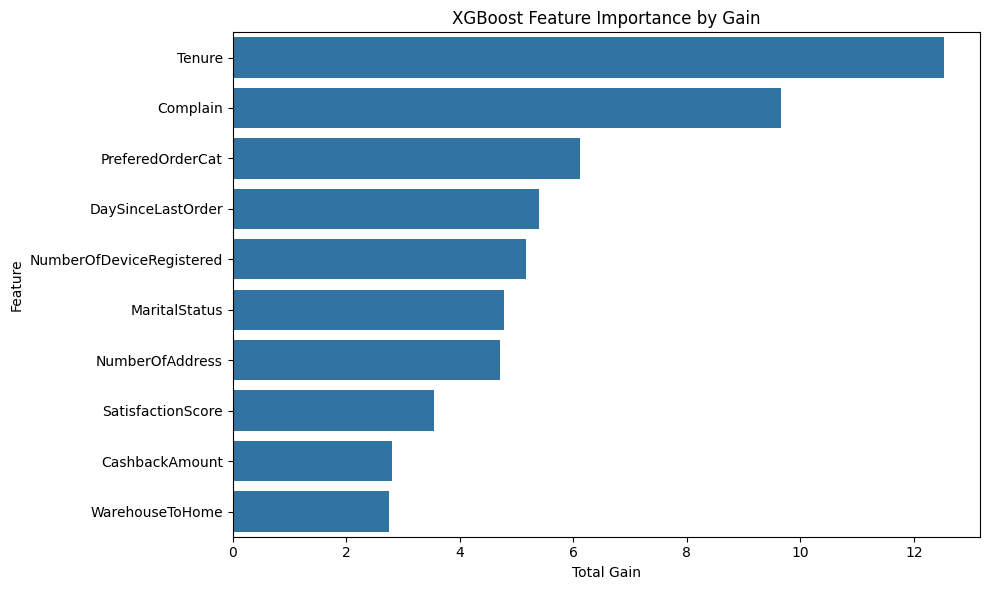


Feature Importance by Gain (Numeric):
        Feature             Gain  
                  Tenure 12.536891
                Complain  9.652925
        PreferedOrderCat  6.114236
       DaySinceLastOrder  5.393421
NumberOfDeviceRegistered  5.158616
           MaritalStatus  4.772324
         NumberOfAddress  4.709062
       SatisfactionScore  3.544714
          CashbackAmount  2.803067
         WarehouseToHome  2.756516


In [69]:
booster = xgb_model.get_booster()
importance_dict = booster.get_score(importance_type='gain')

feature_importance_df = pd.DataFrame({
    'Feature': list(importance_dict.keys()),
    'Gain': list(importance_dict.values())
})

feature_importance_df = feature_importance_df.sort_values(by='Gain', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Gain', y='Feature', data=feature_importance_df)
plt.title('XGBoost Feature Importance by Gain')
plt.xlabel('Total Gain')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nFeature Importance by Gain (Numeric):")
print(feature_importance_df.to_string(index=False))

| No | Fitur                    |  Gain | Penjelasan                                                                    |
| -- | ------------------------ | ---------- | ----------------------------------------------------------------------------------- |
| 1  | Tenure                   | 12.53     | Pelanggan dengan masa bergabung tertentu (terutama baru) lebih rentan untuk churn.  |
| 2  | Complain                 | 9.65      | Pelanggan yang pernah mengeluh lebih mungkin untuk berhenti menggunakan layanan.    |
| 3  | PreferedOrderCat         | 6.11      | Kategori produk favorit memengaruhi loyalitas atau kebosanan pelanggan.             |
| 4  | DaySinceLastOrder        | 5.39      | Semakin lama pelanggan tidak belanja, semakin tinggi risiko churn.                  |
| 5  | MaritalStatus            | 4.77      | Status menikah bisa menunjukkan stabilitas yang memengaruhi loyalitas pelanggan.    |
| 6  | NumberOfAddress          | 4.70      | Banyaknya alamat bisa menunjukkan mobilitas atau kompleksitas penggunaan layanan.   |
| 7  | NumberOfDeviceRegistered | 5.15      | Semakin banyak perangkat, semakin tinggi keterlibatan pelanggan.                    |
| 8  | SatisfactionScore        | 3.54      | Skor kepuasan memberi sinyal risiko churn, tapi dampaknya tidak sebesar fitur lain. |
| 9  | CashbackAmount           | 2.80      | Cashback memengaruhi retensi, namun tidak terlalu signifikan dibanding lainnya.     |


#### Random Forest

In [70]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Model:")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_rf):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_rf):.4f}")
print(classification_report(y_test, y_test_pred_rf))


Random Forest Model:
Training Accuracy: 1.0000
Test Accuracy: 0.9640
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       654
           1       0.96      0.96      0.96       653

    accuracy                           0.96      1307
   macro avg       0.96      0.96      0.96      1307
weighted avg       0.96      0.96      0.96      1307



In [71]:
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None], 
    'bootstrap': [True, False]
}


grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


print(f"Best Parameters: {grid_search.best_params_}")
best_rf_model = grid_search.best_estimator_

y_train_pred_rf = best_rf_model.predict(X_train)
y_test_pred_rf = best_rf_model.predict(X_test)

print("\nRandom Forest Model:")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_rf):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_rf):.4f}")
print(classification_report(y_test, y_test_pred_rf))

Fitting 3 folds for each of 486 candidates, totalling 1458 fits


Best Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Random Forest Model:
Training Accuracy: 1.0000
Test Accuracy: 0.9679
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       654
           1       0.97      0.96      0.97       653

    accuracy                           0.97      1307
   macro avg       0.97      0.97      0.97      1307
weighted avg       0.97      0.97      0.97      1307



In [72]:
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [8, 10, 12],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 5],
    'max_features': ['sqrt'],
    'bootstrap': [True],
    'max_samples': [0.7, 0.8] 
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


print(f"Best Parameters: {grid_search.best_params_}")
best_rf_model = grid_search.best_estimator_

y_train_pred_rf = best_rf_model.predict(X_train)
y_test_pred_rf = best_rf_model.predict(X_test)

print("\nRandom Forest Model:")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_rf):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_rf):.4f}")
print(classification_report(y_test, y_test_pred_rf))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'bootstrap': True, 'max_depth': 12, 'max_features': 'sqrt', 'max_samples': 0.8, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 200}

Random Forest Model:
Training Accuracy: 0.9755
Test Accuracy: 0.9357
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       654
           1       0.93      0.94      0.94       653

    accuracy                           0.94      1307
   macro avg       0.94      0.94      0.94      1307
weighted avg       0.94      0.94      0.94      1307



Dari proses tuning yang telah dilakukan, saya menemukan kombinasi parameter Random Forest yang menghasilkan keseimbangan sangat baik antara akurasi pada data pelatihan dan data pengujian, yaitu:

- n_estimators = 100: Menggunakan 100 pohon keputusan dalam model. Jumlah ini cukup untuk menghasilkan prediksi yang stabil tanpa membuat pelatihan terlalu lama.
- max_depth = 10: Membatasi kedalaman pohon hingga 10 level untuk mencegah model terlalu kompleks dan overfitting.
- min_samples_split = 5: Sebuah node hanya akan dibagi jika memiliki minimal 5 data. Ini membuat model lebih konservatif dalam membuat pembagian.
- min_samples_leaf = 3: Setiap daun minimal harus memiliki 3 data, mencegah pembentukan daun yang terlalu kecil dan rentan terhadap noise.
- max_features = 'sqrt': Hanya sebagian kecil dari fitur (akar kuadrat dari total fitur) yang dipertimbangkan saat membagi node, meningkatkan keragaman antar pohon dan kemampuan generalisasi.
- bootstrap = True: Setiap pohon dilatih dengan sampel acak dari data, sebuah ciri khas Random Forest untuk meningkatkan stabilitas model.
- max_samples = 0.8: Setiap pohon hanya melihat 80% data, menambah variasi dan mengurangi kemungkinan overfitting.

Hasilnya, model memiliki Training Accuracy sebesar 97.55% dan Test Accuracy sebesar 93.57%, yang menunjukkan bahwa model mampu belajar dari data pelatihan dengan baik namun tetap akurat saat menghadapi data baru yang belum pernah dilihat sebelumnya.

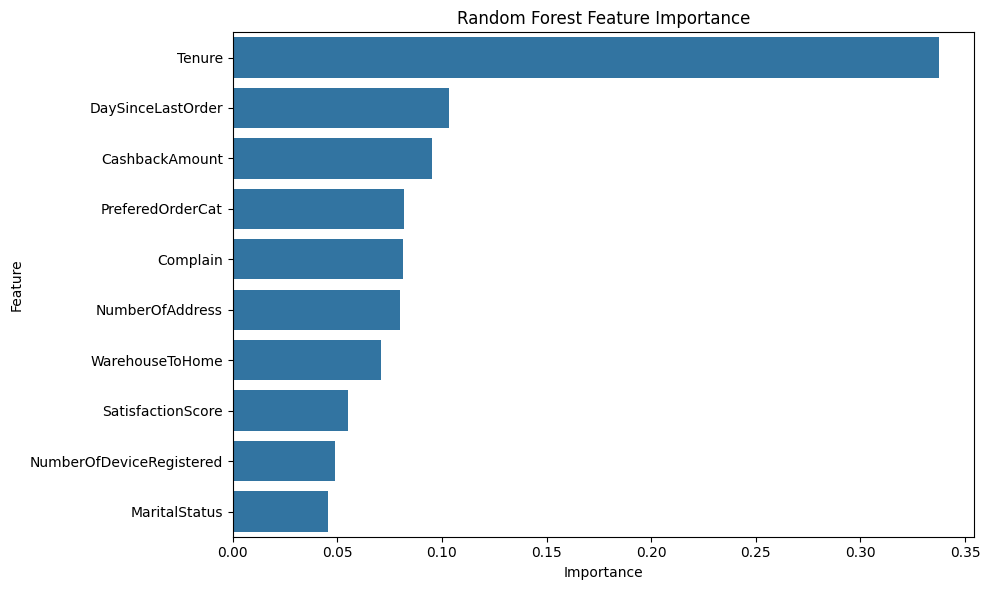

Feature Importance by Random Forest (Numeric):
           Feature           Importance
0                    Tenure   0.337579 
8         DaySinceLastOrder   0.103517 
9            CashbackAmount   0.095202 
3          PreferedOrderCat   0.082116 
7                  Complain   0.081318 
6           NumberOfAddress   0.079943 
1           WarehouseToHome   0.070650 
4         SatisfactionScore   0.055041 
2  NumberOfDeviceRegistered   0.048990 
5             MaritalStatus   0.045643 


In [73]:
importances = best_rf_model.feature_importances_

# Mengonversi ke dalam DataFrame untuk memudahkan interpretasi
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("Feature Importance by Random Forest (Numeric):")
print(feature_importance_df)



| **Feature**                  | **Importance** | **Penjelasan**                                                               |
| ---------------------------- | -------------- | ---------------------------------------------------------------------------- |
| **Tenure**                   | 0.337579       | Lama pelanggan berlangganan, berpengaruh besar terhadap churn.               |
| **DaySinceLastOrder**        | 0.103517       | Jumlah hari sejak pesanan terakhir, menggambarkan ketertarikan pelanggan.    |
| **CashbackAmount**           | 0.095202       | Total cashback yang diterima, mempengaruhi loyalitas pelanggan.              |
| **PreferedOrderCat**         | 0.082116       | Kategori pesanan yang disukai, mempengaruhi pola pembelian pelanggan.        |
| **Complain**                 | 0.081318       | Keluhan pelanggan, sering kali terkait dengan churn.                         |
| **NumberOfAddress**          | 0.079943       | Jumlah alamat terdaftar, dapat menunjukkan keseriusan pelanggan.             |
| **WarehouseToHome**          | 0.070650       | Jarak pengiriman, mempengaruhi kepuasan pelanggan terhadap waktu pengiriman. |
| **SatisfactionScore**        | 0.055041       | Kepuasan pelanggan, indikator penting untuk churn.                           |
| **NumberOfDeviceRegistered** | 0.048990       | Jumlah perangkat terdaftar, menunjukkan tingkat penggunaan layanan.          |
| **MaritalStatus**            | 0.045643       | Status perkawinan, memberi gambaran tentang perilaku pelanggan.              |


#### Decision tree

In [74]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)
print("\nDecision Tree Model:")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_dt):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_dt):.4f}")
print(classification_report(y_test, y_test_pred_dt))


Decision Tree Model:
Training Accuracy: 1.0000
Test Accuracy: 0.9365
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       654
           1       0.95      0.92      0.94       653

    accuracy                           0.94      1307
   macro avg       0.94      0.94      0.94      1307
weighted avg       0.94      0.94      0.94      1307



In [75]:
dt_model = DecisionTreeClassifier(random_state=42)


param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],  
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

best_dt_model = grid_search.best_estimator_

y_train_pred_dt = best_dt_model.predict(X_train)
y_test_pred_dt = best_dt_model.predict(X_test)

print("\nDecision Tree Model:")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_dt):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_dt):.4f}")
print(classification_report(y_test, y_test_pred_dt))

Fitting 3 folds for each of 270 candidates, totalling 810 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Decision Tree Model:
Training Accuracy: 1.0000
Test Accuracy: 0.9327
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       654
           1       0.94      0.92      0.93       653

    accuracy                           0.93      1307
   macro avg       0.93      0.93      0.93      1307
weighted avg       0.93      0.93      0.93      1307



In [76]:
dt_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [5, 10, 15, 20, None],  
    'min_samples_split': [5, 10, 15],   
    'min_samples_leaf': [2, 5, 10],      
    'criterion': ['gini', 'entropy'],   
    'max_features': ['sqrt', 'log2', None],  
    'random_state': [42]  
}


grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


print(f"Best Parameters: {grid_search.best_params_}")


best_dt_model = grid_search.best_estimator_


y_train_pred_dt = best_dt_model.predict(X_train)
y_test_pred_dt = best_dt_model.predict(X_test)

print("\nDecision Tree Model:")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_dt):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_dt):.4f}")
print(classification_report(y_test, y_test_pred_dt))

Fitting 3 folds for each of 270 candidates, totalling 810 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'random_state': 42}

Decision Tree Model:
Training Accuracy: 0.9860
Test Accuracy: 0.9281
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       654
           1       0.95      0.90      0.93       653

    accuracy                           0.93      1307
   macro avg       0.93      0.93      0.93      1307
weighted avg       0.93      0.93      0.93      1307



- criterion='entropy': Metrik ini digunakan untuk memilih fitur terbaik dalam pembagian node. Dengan menggunakan "entropy", model mempertimbangkan ketidakpastian dalam pemilihan fitur, yang membantu meningkatkan kinerja model pada data yang lebih kompleks.
- max_depth=20: Menetapkan batas kedalaman pohon hingga 20 tingkat. Hal ini membatasi kompleksitas model dan mencegah pohon menjadi terlalu dalam (overfitting).
- min_samples_split=5: Menetapkan batas minimal jumlah sampel untuk membagi node menjadi 5. Ini membantu model untuk tidak membagi terlalu banyak, sehingga mengurangi kemungkinan overfitting.
- min_samples_leaf=2: Menetapkan jumlah minimal sampel di daun menjadi 2. Dengan cara ini, model menghindari pembuatan cabang yang terlalu spesifik dengan sedikit sampel.
- max_features=None: Menggunakan semua fitur yang tersedia untuk pembagian setiap node.

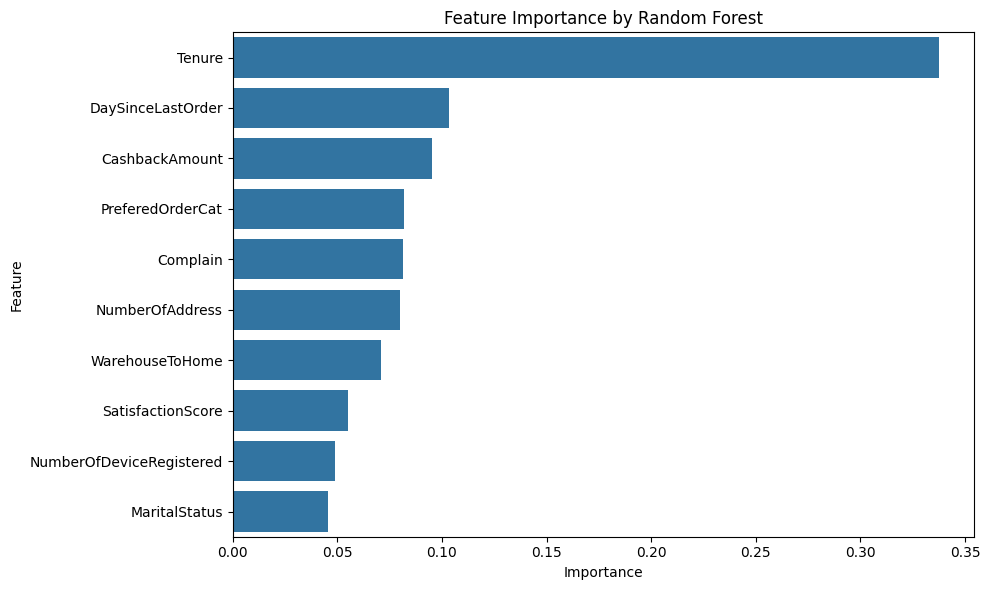

Feature Importance by Random Forest (Numeric):
        Feature           Importance
                  Tenure   0.337579 
       DaySinceLastOrder   0.103517 
          CashbackAmount   0.095202 
        PreferedOrderCat   0.082116 
                Complain   0.081318 
         NumberOfAddress   0.079943 
         WarehouseToHome   0.070650 
       SatisfactionScore   0.055041 
NumberOfDeviceRegistered   0.048990 
           MaritalStatus   0.045643 


In [77]:
importances = best_rf_model.feature_importances_
feature_names = X_train.columns

rf_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})


rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df)
plt.title('Feature Importance by Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("Feature Importance by Random Forest (Numeric):")
print(rf_importance_df.to_string(index=False))



| **Feature**                  | **Importance** | **Penjelasan**                                                               |
| ---------------------------- | -------------- | ---------------------------------------------------------------------------- |
| **Tenure**                   | 0.337579       | Lama pelanggan berlangganan, berpengaruh besar terhadap churn.               |
| **DaySinceLastOrder**        | 0.103517       | Jumlah hari sejak pesanan terakhir, menggambarkan ketertarikan pelanggan.    |
| **CashbackAmount**           | 0.095202       | Total cashback yang diterima, mempengaruhi loyalitas pelanggan.              |
| **PreferedOrderCat**         | 0.082116       | Kategori pesanan yang disukai, mempengaruhi pola pembelian pelanggan.        |
| **Complain**                 | 0.081318       | Keluhan pelanggan, sering kali terkait dengan churn.                         |
| **NumberOfAddress**          | 0.079943       | Jumlah alamat terdaftar, dapat menunjukkan keseriusan pelanggan.             |
| **WarehouseToHome**          | 0.070650       | Jarak pengiriman, mempengaruhi kepuasan pelanggan terhadap waktu pengiriman. |
| **SatisfactionScore**        | 0.055041       | Kepuasan pelanggan, indikator penting untuk churn.                           |
| **NumberOfDeviceRegistered** | 0.048990       | Jumlah perangkat terdaftar, menunjukkan tingkat penggunaan layanan.          |
| **MaritalStatus**            | 0.045643       | Status perkawinan, memberi gambaran tentang perilaku pelanggan.              |


## Model Evaluations and Import To PKL

| Model         | Training Accuracy | Test Accuracy | Overfitting? | Penjelasan                                       |
| ------------- | ----------------- | ------------- | ------------ | --------------------------------------------- |
| Decision Tree | 98.60%            | 92.81%        | Sedikit      | Cenderung mudah overfit, walau sudah dituning |
| Random Forest | 97.55%            | 93.57%        | Stabil       | Generalisasi bagus, performa konsisten        |
| XGBoost       | 99.06%            | 96.25%        | Sedikit      | Akurasi tertinggi, performa baik di test set  |


Saya memakai dua metrik penting, yaitu **Training Accuracy** dan **Test Accuracy**. Training Accuracy mengukur seberapa baik model mempelajari data yang digunakan untuk melatihnya. Jika terlalu tinggi, bisa jadi model tersebut mengalami overfitting, di mana model terlalu menghafal data pelatihan tanpa dapat menggeneralisasi pola-pola penting. Sebaliknya, jika training accuracy terlalu rendah, model tersebut bisa underfit, yang berarti model tidak belajar cukup dari data pelatihan untuk memprediksi dengan baik.

Sementara itu, Test Accuracy memberikan gambaran tentang seberapa baik model dalam memprediksi data yang tidak terlihat sebelumnya, yaitu data pengujian. Test accuracy ini lebih penting karena menggambarkan bagaimana model akan bekerja di dunia nyata, di mana model tidak hanya akan menghadapi data pelatihan, tetapi juga data yang berbeda yang belum pernah dilihat sebelumnya.

### Using Best Model

Setelah membandingkan ketiga model yang telah diuji, saya memutuskan untuk memilih **Random Forest** sebagai model terbaik untuk kasus churn ini. Random Forest menunjukkan performa yang sangat stabil dengan Test Accuracy sebesar 93.57%, yang hampir setara dengan Training Accuracy (97.55%). Hal ini menunjukkan bahwa model ini memiliki kemampuan generalisasi yang baik, yang sangat penting ketika menghadapi data baru atau data yang tidak dilihat sebelumnya. Selain itu, Random Forest cenderung lebih tahan terhadap overfitting karena menggabungkan banyak pohon keputusan, yang membuatnya lebih robust dan mampu bekerja dengan baik meskipun data memiliki variasi atau noise.

Di sisi lain, meskipun XGBoost menunjukkan Training Accuracy tertinggi (99.06%) dan Test Accuracy yang sangat baik (96.25%), model ini menunjukkan sedikit tanda overfitting. Selisih yang cukup besar antara Training Accuracy dan Test Accuracy menunjukkan bahwa model ini cenderung terlalu mempelajari detail-data tertentu pada data pelatihan, yang mungkin tidak selalu relevan untuk data baru. Meskipun performa pada test set cukup baik, overfitting ini bisa mengurangi keandalan model ketika diterapkan di dunia nyata.

Oleh karena itu, meskipun XGBoost memiliki performa yang sangat baik di data pelatihan dan pengujian, saya lebih memilih Random Forest karena keseimbangan yang lebih baik antara akurasi pada data pelatihan dan pengujian, serta kemampuannya untuk menghindari overfitting secara lebih efektif. Model ini lebih dapat diandalkan untuk prediksi churn yang konsisten di berbagai kondisi dan data baru.

### Random Forest Importing .pkl

In [78]:
import joblib
joblib.dump(best_rf_model, 'random_forest_model.pkl')

print("Sucess")

Sucess


Model Importing adalah proses memuat model yang telah dilatih sebelumnya (biasanya disimpan dalam format file) untuk digunakan kembali tanpa perlu melatihnya dari awal. Proses ini sangat berguna ketika model sudah dipelajari dengan data yang besar atau membutuhkan waktu pelatihan yang lama, dan kita ingin menggunakannya untuk prediksi pada data baru di masa depan.

## Conclusion and Recomendations

**Model Machine Learning**      
Model prediksi churn terbukti dapat mengidentifikasi pelanggan yang berpotensi churn secara akurat, dengan test accuracy hingga 93.57% dan f1-score mencapai 0.94 pada Random Forest.

**Variabel Penting dalam Churn**        
| Feature               | Importance | Insight                                                               |
| --------------------- | ---------- | --------------------------------------------------------------------- |
| **Tenure**            | 0.3376     | Pelanggan dengan masa langganan pendek lebih berisiko untuk churn.    |
| **DaySinceLastOrder** | 0.1035     | Ketidakterlibatan dalam waktu lama bisa menandakan hilangnya minat.   |
| **CashbackAmount**    | 0.0952     | Cashback tinggi menunjukkan pelanggan loyal yang perlu dipertahankan. |
| **Complain**          | 0.0813     | Keluhan berhubungan dengan churn, perlu penanganan khusus.            |


**Recomendations**      
1. Prioritaskan Intervensi terhadap Pelanggan Berisiko Tinggi
Gunakan hasil model untuk mengidentifikasi pelanggan dengan skor churn tinggi dan lakukan tindakan preventif, seperti:
- Penawaran eksklusif untuk pelanggan dengan DaySinceLastOrder tinggi.
- Program loyalitas untuk pelanggan dengan cashback besar.

2. Perhatikan Pelanggan Baru dan Keluhan
Pelanggan dengan Tenure pendek perlu diberi onboarding dan layanan ekstra agar tidak churn lebih awal. Segera tanggapi pelanggan dengan riwayat keluhan, karena mereka lebih berpotensi churn.

3. Integrasikan Model ke Dalam Sistem Operasional
Model prediksi churn ini sebaiknya diintegrasikan ke dalam sistem CRM internal agar tim marketing dan customer service dapat secara langsung mengakses informasi risiko churn dan melakukan intervensi lebih terarah.